In [1]:
import conceptnet_lite
conceptnet_lite.connect("../OPENAI/data/conceptnet.db")
from conceptnet_lite import Label, edges_for, edges_between

In [2]:
import spacy
nlp = spacy.load("en_core_web_md") # modelo de nlp

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11060). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
relaciones_generales=["is_a","etymologically_related_to","manner_of","has_a","derived_from","has_property","form_of","causes","has_prerequisite","has_subevent","has_first_subevent","relate_to","similar_to​"]
relaciones_especificas=["is_a","manner_of","has_a","derived_from","has_property","form_of","causes","has_prerequisite","has_subevent","has_first_subevent"]

In [4]:
def bag_of_synonyms(word):
    sinonimos=set()
    try:
        for e in edges_for(Label.get(text=word, language='en').concepts, same_language=True):
            if e.relation.name == "synonym":
                if word== e.start.text:
                    sinonimos.add(e.end.text)
                elif word== e.end.text:
                    sinonimos.add(e.start.text)
    except:
        pass
    sinonimos.add(word)
    return sinonimos

def bag_of_antonyms(word):
    antonimos=set()
    try:
        for e in edges_for(Label.get(text=word, language='en').concepts, same_language=True):
            if e.relation.name in ["antonym","distinc_from"]:
                print(e.start.text,e.relation.name,e.end.text,e.etc['weight'])
                if word== e.start.text:
                    antonimos.add(e.end.text)
                elif word== e.end.text:
                    antonimos.add(e.start.text)
                
    except:
        pass
    return antonimos

def bag_of_hyperonyms(word):
    hiperonimos=set()
    try:
        for e in edges_for(Label.get(text=word, language='en').concepts, same_language=True):
            if e.relation.name in relaciones_generales:
                if word== e.start.text:
                    hiperonimos.add(e.end.text)
    except:
        pass
    return hiperonimos

def bag_of_hyponyms(word):
    hiponimos=set()
    try:
        for e in edges_for(Label.get(text=word, language='en').concepts, same_language=True):
            if e.relation.name in relaciones_especificas:
                if word== e.end.text:
                    hiponimos.add(e.start.text)
                    print(e.relation.name,e.start.text)
    except:
        pass
    return hiponimos

In [5]:
texto="Fishermen using poison sodium cyanide have helped destroy estimated 70% reefs"
texto="A person in appropriate institution protection works with meals."
hipotesis="Cyanide fishing linked destruction area reefs"

In [6]:
doc = nlp(texto)
poses=[]
tokens=[]
lemmas=[]
for token in doc:
    poses.append(token.pos_)
    tokens.append(token.text)
    lemmas.append(token.lemma_)
    # if token.pos_ in ["NOUN","VERB","ADJ","ADV","PRON","PART","PROPN","ADP","NUM"] or token.dep_=="neg":
    #     poses.append(token.pos_)
    #     tokens.append(token.text)
    #     lemmas.append(token.lemma_)
    # elif token.text ==".":
    #     poses.append(token.pos_)
    #     tokens.append(token.text)
    #     lemmas.append(token.lemma_)
    # else:
    #     print(token.text,token.pos_,token.dep_)
poses.append("<F>")
tokens.append("</F>")
lemmas.append("</F>")
print(tokens)
print(poses)
print(lemmas)

['A', 'person', 'in', 'appropriate', 'institution', 'protection', 'works', 'with', 'meals', '.', '</F>']
['DET', 'NOUN', 'ADP', 'ADJ', 'NOUN', 'NOUN', 'VERB', 'ADP', 'NOUN', 'PUNCT', '<F>']
['a', 'person', 'in', 'appropriate', 'institution', 'protection', 'work', 'with', 'meal', '.', '</F>']


In [7]:
doc = nlp(texto)

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

Noun phrases: ['A person', 'appropriate institution protection', 'meals']
Verbs: ['work']


In [8]:
verbos_atributos=["use","is","dress","in","with","wear","by","of"]
pos_excluyentes=["PUNCT","DET","CCONJ"]

In [9]:
def representacion(texto,nlp):
    doc =nlp(texto)
    poses=[]
    tokens=[]
    lemmas=[]
    children=[]
    verb_vincu=[]
    for token in doc:
        #print(token.text, token.dep_, token.head.text, token.head.pos_,
        #    [child for child in token.children])
        poses.append(token.pos_)
        tokens.append(token.text)
        lemmas.append(token.lemma_)
        verb_vincu.append(token.head.lemma_)
        children.append([child for child in token.children])
    poses.append("<F>")
    tokens.append("</F>")
    lemmas.append("</F>")
    children.append("</F>")
    verb_vincu.append("</F>")
    print("tokens",tokens)
    print("poses",poses)
    print("lemmas",lemmas)#
    print("children",children)
    print("verbos_vinculantes",verb_vincu)#
    noun_phrase= [chunk.lemma_ for chunk in doc.noun_chunks]
    verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
    for n_p in noun_phrase:
        print(len(n_p.split(" ")))
        print(n_p)
    # Find named entities, phrases and concepts
    print(verbs)
    for entity in doc.ents:
        print(entity.text, entity.label_)
    print("nodos")
    nodos=[]
    i=0
    bandera=True
    for l in poses:
        if bandera==False and l=="VERB":
            bandera= True
            print("cambio de direccion",lemmas[i])
        elif bandera==True and l=="VERB":
            bandera=False
            print("cambio de direccion",lemmas[i])
        if lemmas[i]!=verb_vincu[i] and poses[i] not in pos_excluyentes:
            if bandera==False:
                if lemmas[i] not in verbos_atributos and verb_vincu[i] not in verbos_atributos:
                    print(lemmas[i],verb_vincu[i])
                    nodos.append((lemmas[i],verb_vincu[i]))
                elif lemmas[i] not in verbos_atributos and verb_vincu[i] in verbos_atributos:
                #print(lemmas.index(verb_vincu[i]))
                    print("a",lemmas[i],verb_vincu[i])
                    print(lemmas[i],verb_vincu[lemmas.index(verb_vincu[i])])
                    nodos.append((lemmas[i],verb_vincu[lemmas.index(verb_vincu[i])]))
            else:
                if lemmas[i] not in verbos_atributos and verb_vincu[i] not in verbos_atributos:
                    print("aq",lemmas[i],verb_vincu[i])
                    nodos.append((lemmas[i],verb_vincu[i]))
                elif lemmas[i] not in verbos_atributos and verb_vincu[i] in verbos_atributos:
                    print(verb_vincu[lemmas.index(verb_vincu[i])],lemmas[i])
                    nodos.append((verb_vincu[lemmas.index(verb_vincu[i])],lemmas[i]))
        i+=1
    return tokens,nodos
#    print(nodos)

In [54]:
def representacion2(nlp,texto):
    doc = nlp(texto.lower())
    dir_sust=dict()
    palabras=[]
    noun_phrase= [chunk.lemma_ for chunk in doc.noun_chunks]
    print(noun_phrase)
    for token in doc:
        print(token.pos_, token.dep_)
    verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
    for chunk in doc.noun_chunks:
        if chunk.root.lemma_!=chunk.lemma_:
            dir_sust[chunk.root.lemma_]=','.join(chunk.lemma_.split()[:-1])
        else:
            dir_sust[chunk.root.lemma_]="NA"
    palabras.extend([chunk.root.lemma_ for chunk in doc.noun_chunks])
    palabras.extend(verbs)
    return dir_sust,palabras

In [55]:
representacion2(nlp,"There is an adult upside down.")

[]
PRON expl
VERB ROOT
DET det
NOUN compound
NOUN advmod
ADV advmod
PUNCT punct


({}, ['be'])

In [12]:
[chunk.lemma_ for chunk in doc.noun_chunks]

['a person', 'appropriate institution protection', 'meal']

In [13]:
dict

dict

In [14]:
principales = [chunk.root.lemma_ for chunk in doc.noun_chunks]

In [15]:
verbos= [token.lemma_ for token in doc if token.pos_ == "VERB"]

In [16]:
principales.extend(verbos)

In [17]:
principales

['person', 'protection', 'meal', 'work']

In [19]:
lemmas

['a',
 'person',
 'in',
 'appropriate',
 'institution',
 'protection',
 'work',
 'with',
 'meal',
 '.',
 '</F>']

In [20]:
[chunk.conjuncts for chunk in doc.noun_chunks]

[(), (), ()]

In [21]:
texto="A man wearing a blue shirt, black apron, eyeglasses and a mask is handling food in a tray."
#texto="A stuffed animal on the couch."
# texto="The sale was made to pay Yuko's US$ 27.5 billion tax bill, Yuganskneftegaz was originally sold for US$ 9.4 billion to a little known company Baikalfinansgroup which was later bought by the Russian state-owned oil company Rosneft ."
#texto="Yuganskneftegaz cost US$ 27.5 billion."
#texto="A group of four children pose on a muddy beach, smiling and making faces."
# texto="A guy in glasses is biting into a pink marshmallow chick while somebody else is puckering their lips out wanting a bite."
#texto="A person in appropriate institution protection works with meals."
# texto="Someone splashing in the water."
# #texto="Someone is having a picnic near the lake."
# texto="Female mosquitoes become infected with the malaria parasite when they draw blood from humans with malaria. The insects can then pass this on to other humans they bite, but do not get sick themselves"
# texto="Two children play in the snow by the side of the road."
#texto="A shirtless man with cropped hair smokes a cigarette and ties a plastic bag."
#texto="The man is not wearing a shirt."
# texto="A young dark-haired woman with red sun visor holding an open white umbrella amidst a crowd of people"
# texto="A raven haired woman is seen by the crowd holding a white opened umbrella."
#texto="Fishermen using poison sodium cyanide have helped destroy estimated 70 reefs"
texto="Claude Chabrol (born June 24, 1930) is a French movie director and has become well-known in the 40 years since his first film, Le Beau Serge , for his chilling tales of murder, including Le Boucher ."
#texto="Le Beau Serge was directed by Chabrol."
texto="Le Boucher was made by a French movie director."

In [22]:
tokens,nodos=representacion(texto.lower(),nlp)

tokens ['le', 'boucher', 'was', 'made', 'by', 'a', 'french', 'movie', 'director', '.', '</F>']
poses ['X', 'PROPN', 'AUX', 'VERB', 'ADP', 'DET', 'ADJ', 'NOUN', 'NOUN', 'PUNCT', '<F>']
lemmas ['le', 'boucher', 'be', 'make', 'by', 'a', 'french', 'movie', 'director', '.', '</F>']
children [[], [le], [], [boucher, was, by, .], [director], [], [], [], [a, french, movie], [], '</F>']
verbos_vinculantes ['boucher', 'make', 'make', 'make', 'make', 'director', 'director', 'director', 'by', 'make', '</F>']
2
le boucher
4
a french movie director
['make']
le boucher PERSON
french NORP
nodos
aq le boucher
aq boucher make
aq be make
cambio de direccion make
french director
movie director
a director by
director make


In [23]:
representacion2(nlp,texto)

({'boucher': 'le', 'director': 'a,french,movie'},
 ['boucher', 'director', 'make'])

In [24]:
h="Fishermen using poison sodium cyanide have helped destroy estimated 70 reefs"
h="Cyanide fishing linked destruction area reefs"
h="The woman is not going to finish the race."
h="A gymnast using a set of paralleled bars."
h="Claude Chabrol (born June 24, 1930) is a French movie director and has become well-known in the 40 years since his first film, Le Beau Serge , for his chilling tales of murder, including Le Boucher ."

In [25]:
tokens,nodos=representacion(h.lower(),nlp)

tokens ['claude', 'chabrol', '(', 'born', 'june', '24', ',', '1930', ')', 'is', 'a', 'french', 'movie', 'director', 'and', 'has', 'become', 'well', '-', 'known', 'in', 'the', '40', 'years', 'since', 'his', 'first', 'film', ',', 'le', 'beau', 'serge', ',', 'for', 'his', 'chilling', 'tales', 'of', 'murder', ',', 'including', 'le', 'boucher', '.', '</F>']
poses ['PROPN', 'PROPN', 'PUNCT', 'VERB', 'PROPN', 'NUM', 'PUNCT', 'NUM', 'PUNCT', 'AUX', 'DET', 'ADJ', 'NOUN', 'NOUN', 'CCONJ', 'AUX', 'VERB', 'ADV', 'PUNCT', 'VERB', 'ADP', 'DET', 'NUM', 'NOUN', 'SCONJ', 'PRON', 'ADJ', 'NOUN', 'PUNCT', 'PROPN', 'PROPN', 'PROPN', 'PUNCT', 'ADP', 'PRON', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'PUNCT', 'VERB', 'X', 'PROPN', 'PUNCT', '<F>']
lemmas ['claude', 'chabrol', '(', 'bear', 'june', '24', ',', '1930', ')', 'be', 'a', 'french', 'movie', 'director', 'and', 'have', 'become', 'well', '-', 'know', 'in', 'the', '40', 'year', 'since', 'his', 'first', 'film', ',', 'le', 'beau', 'serge', ',', 'for', 'his', 'chilling'

In [26]:
tokens

['claude',
 'chabrol',
 '(',
 'born',
 'june',
 '24',
 ',',
 '1930',
 ')',
 'is',
 'a',
 'french',
 'movie',
 'director',
 'and',
 'has',
 'become',
 'well',
 '-',
 'known',
 'in',
 'the',
 '40',
 'years',
 'since',
 'his',
 'first',
 'film',
 ',',
 'le',
 'beau',
 'serge',
 ',',
 'for',
 'his',
 'chilling',
 'tales',
 'of',
 'murder',
 ',',
 'including',
 'le',
 'boucher',
 '.',
 '</F>']

In [27]:
import networkx as nx

G=nx.DiGraph()
G.add_edges_from(nodos)

print("Los vértices de G son {}".format(list(G.nodes)))
print("Las aristas de G son {}".format(list(G.edges)))

Los vértices de G son ['claude', 'chabrol', 'be', 'bear', 'june', '24', '1930', 'french', 'director', 'movie', 'have', 'become', 'well', 'know', '40', 'year', 'since', 'his', 'film', 'first', 'le', 'beau', 'serge', 'for', 'tale', 'chilling', 'murder', 'include', 'boucher']
Las aristas de G son [('claude', 'chabrol'), ('chabrol', 'be'), ('bear', 'chabrol'), ('june', 'bear'), ('24', 'june'), ('1930', 'june'), ('french', 'director'), ('director', 'be'), ('movie', 'director'), ('have', 'become'), ('become', 'be'), ('well', 'know'), ('know', 'become'), ('40', 'year'), ('year', 'know'), ('since', 'become'), ('his', 'film'), ('his', 'tale'), ('film', 'since'), ('first', 'film'), ('le', 'beau'), ('le', 'boucher'), ('beau', 'serge'), ('serge', 'film'), ('for', 'film'), ('tale', 'for'), ('chilling', 'tale'), ('murder', 'tale'), ('include', 'tale'), ('boucher', 'include')]


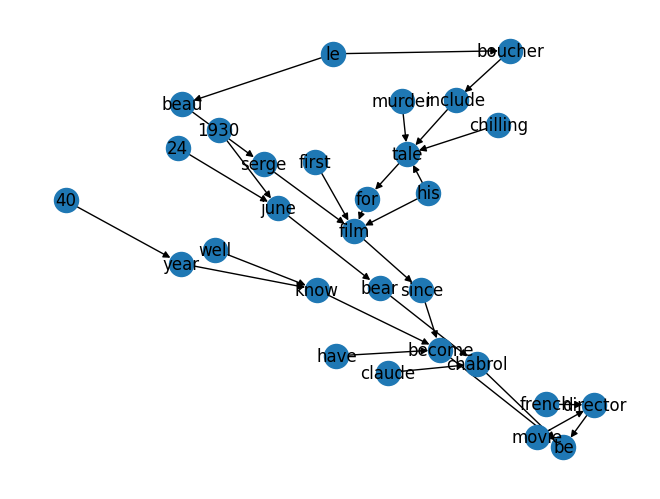

In [28]:
nx.draw(G,with_labels=True)

In [29]:
def maximo_degree(G):
    p=0
    for n,w in list(G.degree()):
        if p<=w:
            max=n
            p=w
    return max,p
maximo_degree(G)

('tale', 5)

In [30]:
for n in nodos:
    print(n)

('claude', 'chabrol')
('chabrol', 'be')
('bear', 'chabrol')
('june', 'bear')
('24', 'june')
('1930', 'june')
('french', 'director')
('movie', 'director')
('director', 'be')
('have', 'become')
('become', 'be')
('well', 'know')
('know', 'become')
('40', 'year')
('year', 'know')
('since', 'become')
('his', 'film')
('first', 'film')
('film', 'since')
('le', 'beau')
('beau', 'serge')
('serge', 'film')
('for', 'film')
('his', 'tale')
('chilling', 'tale')
('tale', 'for')
('murder', 'tale')
('include', 'tale')
('le', 'boucher')
('boucher', 'include')


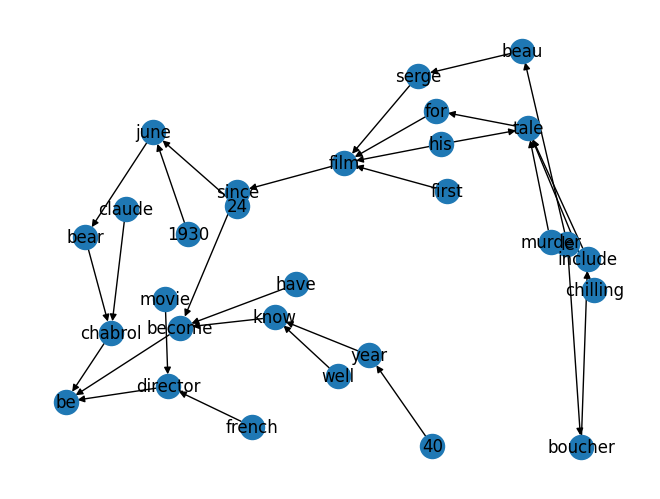

In [31]:
nx.draw(G,with_labels=True)

In [32]:
list(G.neighbors("yuganskneftegaz"))

NetworkXError: The node yuganskneftegaz is not in the digraph.

In [33]:
list(G.predecessors("sell"))

NetworkXError: The node sell is not in the digraph.

In [34]:
list(G.successors("yuganskneftegaz"))

NetworkXError: The node yuganskneftegaz is not in the digraph.

In [35]:
texto="An old man with a package poses in front of an advertisement."
texto="A man poses in front of an ad for beer."
texto="A man wearing a blue shirt, black apron, eyeglasses, and a mask is handling food in a tray."
texto="A man dressed in a red shirt and black tie stands up at a wedding reception to make a speech."
texto="Two children play in the snow by the side of the road."
texto="A child in a maroon shirt playing next to a fountain."
#texto="The child is getting wet from the fountain."
# texto="The man is not wearing a shirt."
# texto="The father and son are repairing the sign."
# texto="A man and a child painting a post."
# texto="A group of people stares at a wall that is filled with drawings in a building."
# #texto="A group of people analyze art together"
# texto="A person obscured in shadow in a gymnasium."
# texto="The person is trying to be sneaky."
texto="A man wearing a blue shirt, black apron, eyeglasses, and a mask is handling food in a tray."
texto="a guy in a red top and tie makes a speech"
texto="A man dressed in a red shirt and black tie stands up at a wedding reception to make a speech."
texto="A young boy runs across a road in front of a sky blue building with barred windows."
texto="An Asian woman in a purple shirt preparing a bowl of food for the younger Asian boy sitting near buy, while an Asian man eats a roll and prepares to take some food up with his chopsticks."
#texto="A woman is preparing food for a child."
texto="Fishermen using poison sodium cyanide have helped destroy estimated 70 reefs"
texto="The woman is not going to finish the race."
#texto="Cyanide fishing linked destruction area reefs"
texto="Dr Wood led a courageous and committed team in the fight to save 28 patients suffering from between two and 92 per cent body burns, deadly infections and delayed shock. As well as receiving much praise from both her own patients and the media, she also attracted controversy among other burns surgeons due to the fact that spray-on skin had not yet been subjected to clinical trials."
texto="Born near Yirrkala in the Northern Territory, Yunupingu is one of the Gumatj clan of the Yolngu people."
#texto="Yunupingu is a member of the Yolngu people."
texto="In the Super Nintendo Entertainment System release of the game as Final Fantasy III , Biggs' name was Vicks."
texto="Final Fantasy III is produced by the Super Nintendo Entertainment System."
texto="A gymnast using a set of paralleled bars."
texto="A young gymnast is performing."
texto="Claude Chabrol (born June 24, 1930) is a French movie director and has become well-known in the 40 years since his first film, Le Beau Serge , for his chilling tales of murder, including Le Boucher ."
texto="Le Beau Serge was directed by Chabrol."

In [36]:
doc = nlp(texto)

In [37]:
texto

'Le Beau Serge was directed by Chabrol.'

In [38]:
for token in doc: #revisar esta dbido a que vincula los verbos para hacer el procesamiento
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children],[f for f in token.ancestors])

Le compound Beau PROPN [] [Beau, Serge, directed]
Beau compound Serge PROPN [Le] [Serge, directed]
Serge nsubjpass directed VERB [Beau] [directed]
was auxpass directed VERB [] [directed]
directed ROOT directed VERB [Serge, was, by, .] []
by agent directed VERB [Chabrol] [directed]
Chabrol pobj by ADP [] [by, directed]
. punct directed VERB [] [directed]


In [39]:
tags=[ 'acl',
 'acomp',
 'advcl',
 'advmod',
 'amod',
 'appos',
 'ccomp',
 'complm',
 'compound',
 'conj',
 'infmod',
 'meta',
 'neg',
 'nmod',
 'nn',
 'npadvmod',
 'nounmod',
 'npmod',
 'num',
 'number',
 'nummod',
 'partmod',
 'pcomp',
 'poss',
 'possessive',
 'prep',
 'quantmod',
 'rcmod',
 'relcl',
 'xcomp',
 'adc',
 'avc',
 'mnr',
 'mo',
 'ng',
 'nmc'
]

In [40]:
#tags=['compound','acomp','xcomp']

In [41]:
sustantivos=[]
dir_sust=dict()
values=[]
for token in doc:
    if token.dep_ in tags or "mod" in token.dep_ or "comp" in token.dep_:
        print(token.text, token.lemma_, token.pos_,token.dep_,token.head.text,token.head.lemma_, token.head.pos_,
            [child for child in token.children])
        sustantivos.append(token.head.lemma_)
        if token.head.lemma_ in dir_sust:
            if dir_sust[token.head.lemma_]=="NA":
                dir_sust[token.head.lemma_]=token.lemma_
                values.append(token.lemma_)
            else:
                dir_sust[token.head.lemma_]=dir_sust[token.head.lemma_]+","+token.lemma_
                values.append(token.lemma_)
        else:
            dir_sust[token.head.lemma_]=token.lemma_
    # elif token.dep_ == "neg":
    #     print("negado",token.head.text,token.head.lemma_)
    #     antonimos=bag_of_antonyms('go')
    #     print(antonimos)
    elif token.pos_ in ["NOUN","PROPN"]:
        print(token.text,token.lemma_, token.pos_,token.dep_)
        sustantivos.append(token.lemma_)
        if token.lemma_ not in dir_sust:
            dir_sust[token.lemma_]="NA"
    elif token.pos_ in ["VERB"]:
        print(token.text, token.lemma_,token.pos_,token.dep_)
        sustantivos.append(token.lemma_)
        if token.lemma_ not in dir_sust:
            dir_sust[token.lemma_]="NA"
print(sustantivos)
print(dir_sust)

Le Le PROPN compound Beau Beau PROPN []
Beau Beau PROPN compound Serge Serge PROPN [Le]
Serge Serge PROPN nsubjpass
directed direct VERB ROOT
Chabrol Chabrol PROPN pobj
['Beau', 'Serge', 'Serge', 'direct', 'Chabrol']
{'Beau': 'Le', 'Serge': 'Beau', 'direct': 'NA', 'Chabrol': 'NA'}


In [42]:
list(dir_sust.keys())

['Beau', 'Serge', 'direct', 'Chabrol']

In [43]:
limpieza_sustantivos=[]
for e in sustantivos:
    limpieza_sustantivos

In [44]:
from spacy import glossary

In [45]:
glossary.GLOSSARY

{'ADJ': 'adjective',
 'ADP': 'adposition',
 'ADV': 'adverb',
 'AUX': 'auxiliary',
 'CONJ': 'conjunction',
 'CCONJ': 'coordinating conjunction',
 'DET': 'determiner',
 'INTJ': 'interjection',
 'NOUN': 'noun',
 'NUM': 'numeral',
 'PART': 'particle',
 'PRON': 'pronoun',
 'PROPN': 'proper noun',
 'PUNCT': 'punctuation',
 'SCONJ': 'subordinating conjunction',
 'SYM': 'symbol',
 'VERB': 'verb',
 'X': 'other',
 'EOL': 'end of line',
 'SPACE': 'space',
 '.': 'punctuation mark, sentence closer',
 ',': 'punctuation mark, comma',
 '-LRB-': 'left round bracket',
 '-RRB-': 'right round bracket',
 '``': 'opening quotation mark',
 '""': 'closing quotation mark',
 "''": 'closing quotation mark',
 ':': 'punctuation mark, colon or ellipsis',
 '$': 'symbol, currency',
 '#': 'symbol, number sign',
 'AFX': 'affix',
 'CC': 'conjunction, coordinating',
 'CD': 'cardinal number',
 'DT': 'determiner',
 'EX': 'existential there',
 'FW': 'foreign word',
 'HYPH': 'punctuation mark, hyphen',
 'IN': 'conjunction, su

In [46]:
tag = 'xcomp'
glossary.explain(tag)

'open clausal complement'

In [49]:
doc = nlp("There is an adult upside down.")

In [50]:
from spacy import displacy
displacy.render(doc, style='dep')

In [95]:
import stanza
stanza.download('en')       # This downloads the English models for the neural pipeline
nlp_stanza = stanza.Pipeline('en') # This sets up a default neural pipeline in English
doc_stanza = nlp_stanza("Barack Obama was born in Hawaii.  He was elected president in 2008.")
doc_stanza.sentences[0].print_dependencies()


/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-25 11:37:57 INFO: Downloaded file to /home/david/stanza_resources/resources.json
2024-04-25 11:37:57 INFO: Downloading default packages for language: en (English) ...
2024-04-25 11:37:58 INFO: File exists: /home/david/stanza_resources/en/default.zip
2024-04-25 11:38:05 INFO: Finished downloading models and saved to /home/david/stanza_resources
2024-04-25 11:38:05 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-04-25 11:38:06 INFO: Downloaded file to /home/david/stanza_resources/resources.json
2024-04-25 11:38:07 INFO: Loading these models for language: en (English):
| Pr

('Barack', 4, 'nsubj:pass')
('Obama', 1, 'flat')
('was', 4, 'aux:pass')
('born', 0, 'root')
('in', 6, 'case')
('Hawaii', 4, 'obl')
('.', 4, 'punct')


In [96]:
doc_stanza = nlp_stanza("The woman is not going to finish the race.")
doc_stanza.sentences[0].print_dependencies()

('People', 7, 'nsubj')
('dressed', 1, 'acl')
('in', 6, 'case')
('traditional', 6, 'amod')
('Japanese', 6, 'amod')
('garb', 2, 'obl')
('walk', 0, 'root')
('in', 10, 'case')
('a', 10, 'det')
('procession', 7, 'obl')
('through', 13, 'case')
('a', 13, 'det')
('courtyard', 7, 'obl')
('paved', 13, 'acl')
('with', 17, 'case')
('paving', 17, 'amod')
('stones', 14, 'obl')
('.', 7, 'punct')


In [44]:
for sent in doc_stanza.sentences:
    for dep in sent.dependencies:
        #print(dep[1])
        if dep[1] == 'amod' or dep[1] == 'nummod' or dep[1] == 'nmod' or dep[1] == 'compound':
            if dep[2].text=='wearing':
                print(dep[2].text)
            else:                
                print(dep[2].text, dep[0].text)
        elif dep[1]=='obl' or dep[1]=='nsubj':
            print(dep[2].text)

People
traditional garb
Japanese garb
garb
procession
courtyard
paving stones
stones
